# Multilayer model MNIST classification

Note: This notebook is designed to run with CPU (no GPU) runtime.

Import modules and set random seeds.

In [1]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190825)
tf.random.set_seed(20190825)

plt.rcParams.update({'font.size': 10})

Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                    (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                    (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Define the multilayer feedforward network model.

**一例として、ノード数が 64 個の全結合層を追加します。**

前結合層を増やしてモデルを複雑にすることにより、モデルの精度は向上するでしょうか？

In [3]:
model = models.Sequential(name='multilayer_model')
model.add(layers.Input(shape=(784,), name='input'))
model.add(layers.Dense(512, activation='relu', name='feedforward1'))
model.add(layers.Dense(256, activation='relu', name='feedforward2'))
model.add(layers.Dense(128, activation='relu', name='feedforward3'))
model.add(layers.Dense(64, activation='relu', name='feedforward4'))  # この行を追加
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "multilayer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feedforward1 (Dense)            │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feedforward2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feedforward3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feedforward4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model using the Adam optimizer, and categorical crossentroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Train the model. It acheves around 98% accuracy for the test dataset.

**テストデータに対する正解率は約98%で、修正前と精度は変化しませんでした。**

約98%という精度は、多層ニューラルネットワークによる予測精度の限界のようです。

これよりさらに精度を向上するには、畳み込みフィルターなどの新しい仕組みの導入が必要と考えられます。



In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.8610 - loss: 0.4806 - val_acc: 0.9646 - val_loss: 0.1162
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - acc: 0.9711 - loss: 0.0977 - val_acc: 0.9721 - val_loss: 0.0953
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - acc: 0.9811 - loss: 0.0622 - val_acc: 0.9740 - val_loss: 0.0908
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9856 - loss: 0.0456 - val_acc: 0.9755 - val_loss: 0.0860
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.9889 - loss: 0.0343 - val_acc: 0.9781 - val_loss: 0.0801
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - acc: 0.9901 - loss: 0.0291 - val_acc: 0.9738 - val_loss: 0.1077
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - acc: 0.9923 - loss: 0.0254 - val_acc: 0.9791 - val_loss: 0.0829
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9933 - loss: 0.0195 - val_acc: 0.9742 - val_loss: 0.1059
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 2

Plot charts for the accuracy and loss values.

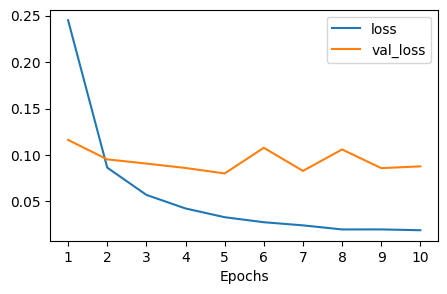

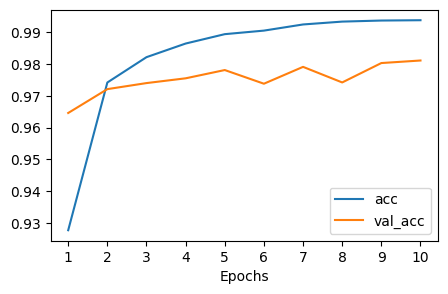

In [6]:
df = DataFrame({'loss': history.history['loss'],
                'val_loss': history.history['val_loss']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)

df = DataFrame({'acc': history.history['acc'],
                'val_acc': history.history['val_acc']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)